# Team information

|Team-number :| 1|
|:----:|:----:|


|Name|    E-Mail        |matriculation-nr.|
|:----:|:----:|:----:|
|Tamara Scherer| schere21@ads.uni-passau.de|104218|
|Felix Müller| muell518@ads.uni-passau.de|104227|


# Import

In [1]:
#from label_studio_sdk import Client
#from label_studio_sdk import project
#from label_studio_sdk import project
#import pandas as pd
#LABEL_STUDIO_URL = 'http://132.231.59.226:8080' #this address needs to be the same as the address the label-studio is hosted on.
#API_KEY = '1655a8922f821195356a17a3224c0532b091c61d' #please add your personal API_Key here to get your API_Key follow the Pictures below

#ls = Client(url=LABEL_STUDIO_URL, api_key=API_KEY)
#ls.check_connection()
#pro = project.Project.get_from_id(ls,"1")
#tasks = project.Project.get_labeled_tasks(pro)
#tasks[0]

In [2]:
# import labeled data
import pickle
with open("Files/tasks3", 'rb') as f:
    tasks = pickle.load(f)

In [3]:
# import necessary packages
import re
import pandas as pd

In [4]:
# filter the necessary texts with the corresponding label
df = pd.DataFrame(columns = ['Text', 'Label',])

for i in range(len(tasks)): 
    for j in range(len(tasks[i]['annotations'][0]['result'])): 
        df = df.append({
            'Text' : tasks[i]['annotations'][0]['result'][j]['value']['text'],
            'Label' : tasks[i]['annotations'][0]['result'][j]['value']['labels']
                        }, ignore_index = True)
df

,Text,Label
0,Good afternoon and thanks a lot for taking my ...,[QID_1]
1,Good afternoon and thanks a lot for taking my...,[Question_1_Company_specific]
2,Good afternoon and thanks a lot for taking my ...,[Question_2_specific]
3,Good afternoon and thanks a lot for taking my ...,[Question_3_neutral]
4,"No, I think that as it relates to the one, I t...",[AID_1]
...,...,...
11289,One of the areas obviously which has been a st...,[Question_3_neutral]
11290,"Well, let's start with the first part of your ...",[AID_1]
11291,"Well, let's start with the first part of your ...",[Answer_1_specific]
11292,"Well, let's start with the first part of your ...",[Answer_2_positive]


In [5]:
# assign a unique number to each label
def categorise(row):  
    if row['Label'] == ['Question_1_Company_specific']:
        return 1
    elif row['Label'] == ['Question_1_Market_related']:
        return 2
    elif row['Label'] == ['Question_2_specific']:
        return 3
    elif row['Label'] == ['Question_2_open']:
        return 4
    elif row['Label'] == ['Question_3_attack']:
        return 5
    elif row['Label'] == ['Question_3_support']:
        return 6
    elif row['Label'] == ['Question_3_neutral']:
        return 7
    elif row['Label'] == ['Answer_1_specific']:
        return 8
    elif row['Label'] == ['Answer_1_avoid_excuse']:
        return 9
    elif row['Label'] == ['Answer_2_positive']:
        return 10
    elif row['Label'] == ['Answer_2_negative']:
        return 11
    elif row['Label'] == ['Answer_3_blame']:
        return 12
    elif row['Label'] == ['Answer_3_no_blame']:
        return 13
    else:
        return 0
    
    
# call function and write results in a new column of the dataframe
df['LabelNumber'] = df.apply(lambda row: categorise(row), axis=1)

df

,Text,Label,LabelNumber
0,Good afternoon and thanks a lot for taking my ...,[QID_1],0
1,Good afternoon and thanks a lot for taking my...,[Question_1_Company_specific],1
2,Good afternoon and thanks a lot for taking my ...,[Question_2_specific],3
3,Good afternoon and thanks a lot for taking my ...,[Question_3_neutral],7
4,"No, I think that as it relates to the one, I t...",[AID_1],0
...,...,...,...
11289,One of the areas obviously which has been a st...,[Question_3_neutral],7
11290,"Well, let's start with the first part of your ...",[AID_1],0
11291,"Well, let's start with the first part of your ...",[Answer_1_specific],8
11292,"Well, let's start with the first part of your ...",[Answer_2_positive],10


**Filter one ID stage (e.g. Question_1_XX)**

In [6]:
idStage = [1, 2]
df = df[df['LabelNumber'].isin(idStage)]

# set new index
df = df.reset_index()
# delete old indices
df.pop('index')
df

,Text,Label,LabelNumber
0,Good afternoon and thanks a lot for taking my...,[Question_1_Company_specific],1
1,"Okay, that's very helpful. And then on your gr...",[Question_1_Company_specific],1
2,"Hi Richard. So, on gross margin, it looked pre...",[Question_1_Market_related],2
3,And the core-on-core was pretty normal for you...,[Question_1_Company_specific],1
4,Okay. And my follow-up is on the EBIT dollar ...,[Question_1_Company_specific],1
...,...,...,...
1304,Hi. This is Mark for Pat. Thank you so much fo...,[Question_1_Company_specific],1
1305,Yes. I'm just wondering if you could talk a li...,[Question_1_Company_specific],1
1306,"Hi, thank you. Congrats on the quarter. Just a...",[Question_1_Company_specific],1
1307,Thanks for squeezing me in guys. This question...,[Question_1_Company_specific],1


# Preprocessing

In [7]:
#pip install gensim

In [8]:
# necessary imports for preprocessing steps

import string
import nltk

# import a stemmer for english words
snowStem = nltk.stem.SnowballStemmer('english')

# import stopwords
from nltk.corpus import stopwords
en_stopwords = stopwords.words('english')

# import for tokenization
from nltk import word_tokenize
nltk.download('punkt')

# import for lemmatizer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ts23\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ts23\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ts23\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ts23\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [9]:
# function that includes all preprocessing steps

def do_preprocessing(text_to_clean, remove_stopwords = True, stemming = True):
    # remove numbers 
    text_to_clean = re.sub(r'\d+', '', text_to_clean)
    # remove leading and ending white spaces
    text_to_clean = text_to_clean.strip()
    # transform text to lower case
    text_to_clean = text_to_clean.lower()

    if stemming:
      # stemming
      text_to_clean = snowStem.stem(text_to_clean)
    
    if remove_stopwords:
        # remove stop words
        text_to_clean = ' '.join([w for w in text_to_clean.split() if not(w in en_stopwords)])

    # remove punctuation
    text_to_clean = text_to_clean.translate(str.maketrans('','', string.punctuation))
    
    return text_to_clean


# call function and write results in new column of the dataframe
df.loc[:, 'CleanText'] = df['Text'].apply(
    lambda x: do_preprocessing(x, True, True))

df

,Text,Label,LabelNumber,CleanText
0,Good afternoon and thanks a lot for taking my...,[Question_1_Company_specific],1,good afternoon thanks lot taking question so r...
1,"Okay, that's very helpful. And then on your gr...",[Question_1_Company_specific],1,okay thats helpful growth china surpass expect...
2,"Hi Richard. So, on gross margin, it looked pre...",[Question_1_Market_related],2,hi richard so gross margin looked pretty solid...
3,And the core-on-core was pretty normal for you...,[Question_1_Company_specific],1,coreoncore pretty normal well
4,Okay. And my follow-up is on the EBIT dollar ...,[Question_1_Company_specific],1,okay followup ebit dollar growth looked like c...
...,...,...,...,...
1304,Hi. This is Mark for Pat. Thank you so much fo...,[Question_1_Company_specific],1,hi mark pat thank much taking question could t...
1305,Yes. I'm just wondering if you could talk a li...,[Question_1_Company_specific],1,yes im wondering could talk little bit custome...
1306,"Hi, thank you. Congrats on the quarter. Just a...",[Question_1_Company_specific],1,hi thank you congrats quarter followup toms qu...
1307,Thanks for squeezing me in guys. This question...,[Question_1_Company_specific],1,thanks squeezing guys question you john know g...


In [10]:
# function for lemmatization
def lemmatization(text):
    
  text = word_tokenize(text)
  
  result=[]
  wordnet = WordNetLemmatizer()
  for token,tag in pos_tag(text):
        pos=tag[0].lower()
        
        if pos not in ['a', 'r', 'n', 'v']:
            pos='n'
            
        result.append(wordnet.lemmatize(token,pos))

  return result

# call function
df['CleanText'] = df['CleanText'].apply(
    lambda x: lemmatization(x))

df

,Text,Label,LabelNumber,CleanText
0,Good afternoon and thanks a lot for taking my...,[Question_1_Company_specific],1,"[good, afternoon, thanks, lot, take, question,..."
1,"Okay, that's very helpful. And then on your gr...",[Question_1_Company_specific],1,"[okay, thats, helpful, growth, china, surpass,..."
2,"Hi Richard. So, on gross margin, it looked pre...",[Question_1_Market_related],2,"[hi, richard, so, gross, margin, look, pretty,..."
3,And the core-on-core was pretty normal for you...,[Question_1_Company_specific],1,"[coreoncore, pretty, normal, well]"
4,Okay. And my follow-up is on the EBIT dollar ...,[Question_1_Company_specific],1,"[okay, followup, ebit, dollar, growth, look, l..."
...,...,...,...,...
1304,Hi. This is Mark for Pat. Thank you so much fo...,[Question_1_Company_specific],1,"[hi, mark, pat, thank, much, take, question, c..."
1305,Yes. I'm just wondering if you could talk a li...,[Question_1_Company_specific],1,"[yes, im, wondering, could, talk, little, bit,..."
1306,"Hi, thank you. Congrats on the quarter. Just a...",[Question_1_Company_specific],1,"[hi, thank, you, congrats, quarter, followup, ..."
1307,Thanks for squeezing me in guys. This question...,[Question_1_Company_specific],1,"[thanks, squeeze, guy, question, you, john, kn..."


**Create dictionary**

In [11]:
from gensim import corpora

# generate the gensim dictionary
dct = corpora.dictionary.Dictionary(df['CleanText']).values()

In [12]:
# convert tokens back to strings for further processing
string1=" "
df['CleanText'] = df['CleanText'].apply(
    lambda x: string1.join(x))

df

,Text,Label,LabelNumber,CleanText
0,Good afternoon and thanks a lot for taking my...,[Question_1_Company_specific],1,good afternoon thanks lot take question so rec...
1,"Okay, that's very helpful. And then on your gr...",[Question_1_Company_specific],1,okay thats helpful growth china surpass expect...
2,"Hi Richard. So, on gross margin, it looked pre...",[Question_1_Market_related],2,hi richard so gross margin look pretty solid w...
3,And the core-on-core was pretty normal for you...,[Question_1_Company_specific],1,coreoncore pretty normal well
4,Okay. And my follow-up is on the EBIT dollar ...,[Question_1_Company_specific],1,okay followup ebit dollar growth look like com...
...,...,...,...,...
1304,Hi. This is Mark for Pat. Thank you so much fo...,[Question_1_Company_specific],1,hi mark pat thank much take question could tal...
1305,Yes. I'm just wondering if you could talk a li...,[Question_1_Company_specific],1,yes im wondering could talk little bit custome...
1306,"Hi, thank you. Congrats on the quarter. Just a...",[Question_1_Company_specific],1,hi thank you congrats quarter followup tom que...
1307,Thanks for squeezing me in guys. This question...,[Question_1_Company_specific],1,thanks squeeze guy question you john know guy ...


# Split of training and test dataset

In [13]:
import numpy as np

training_fraction = 0.70
training_size = int(np.floor(len(df) * training_fraction))

data_train, data_test = df[:training_size], df[training_size:]

# Bag-of-Words (BOW)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

def do_bow(data):
    count_vec = CountVectorizer(vocabulary = dct)

    bow = count_vec.fit_transform(data['CleanText'])
    bow_matrix = pd.DataFrame(data = bow.toarray(), columns = count_vec.get_feature_names_out())

    display(bow_matrix)
    
    return(bow_matrix)

# call function
train_bow_matrix = do_bow(data_train)
test_bow_matrix = do_bow(data_test)

,afternoon,anniversary,benefit,decision,different,do,drive,give,good,growth,...,realignment,rpo,shed,asics,hock,jericho,optical,performing,tomahawk,trident
0,1,1,1,1,1,1,2,1,1,2,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
912,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
914,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


,afternoon,anniversary,benefit,decision,different,do,drive,give,good,growth,...,realignment,rpo,shed,asics,hock,jericho,optical,performing,tomahawk,trident
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
390,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
391,0,0,0,0,0,0,0,1,0,0,...,0,2,1,0,0,0,0,0,0,0


# TF-IDF

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

def do_tfidf(data):
    tfidf_vec = TfidfVectorizer(vocabulary = dct)

    tfidf = tfidf_vec.fit_transform(data['CleanText'])
    tfidf_matrix = pd.DataFrame(data = tfidf.toarray(), columns = tfidf_vec.get_feature_names_out())

    display(tfidf_matrix)
    
    return(tfidf_matrix)

# call function
train_tfidf_matrix = do_tfidf(data_train)
test_tfidf_matrix = do_tfidf(data_test)

,afternoon,anniversary,benefit,decision,different,do,drive,give,good,growth,...,realignment,rpo,shed,asics,hock,jericho,optical,performing,tomahawk,trident
0,0.153021,0.236999,0.155793,0.177425,0.126805,0.153021,0.243532,0.085938,0.115618,0.194891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.174402,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.152685,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.237623,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
913,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
914,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.093197,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,afternoon,anniversary,benefit,decision,different,do,drive,give,good,growth,...,realignment,rpo,shed,asics,hock,jericho,optical,performing,tomahawk,trident
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.145685,0.0,0.0,0.087808,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
389,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
390,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.180413,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
391,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.093644,0.0,0.000000,...,0.000000,0.464447,0.232224,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# LSA

In [16]:
from scipy.sparse.linalg import svds

def do_lsa(data):
    num_components = 10
    q, s, p = svds(data, k = num_components)

    lsa_doc_matrix = pd.DataFrame(data=q)

    display(lsa_doc_matrix)

    return(lsa_doc_matrix)

# call function
train_lsa_matrix = do_lsa(train_tfidf_matrix)
test_lsa_matrix = do_lsa(test_tfidf_matrix)

,0,1,2,3,4,5,6,7,8,9
0,0.063852,0.001987,0.017864,0.101711,0.045427,0.036281,0.051261,-0.006285,0.017381,0.044309
1,0.047987,0.020022,0.008672,0.021375,-0.035792,0.001680,0.039789,-0.006914,0.015449,0.018086
2,0.026689,0.022862,0.013200,0.021622,0.027197,-0.011017,-0.065299,-0.003146,-0.033844,0.049235
3,-0.003002,-0.003607,-0.005458,0.019330,0.013714,-0.007566,-0.002486,0.010854,-0.011877,0.008377
4,0.076328,0.032857,0.035851,0.011290,-0.007317,-0.074875,-0.005319,-0.090881,-0.057036,0.062475
...,...,...,...,...,...,...,...,...,...,...
911,0.012822,0.009924,0.009228,-0.045003,-0.012187,0.011660,-0.042534,-0.017822,0.017820,0.038597
912,-0.016243,0.016886,-0.003163,-0.036650,-0.014578,0.031850,-0.014996,0.002250,0.003314,0.022267
913,0.004968,0.031451,0.037696,-0.015868,0.002805,-0.008951,-0.007917,-0.017709,0.000577,0.017045
914,-0.011292,0.023081,0.005894,-0.018354,-0.007153,0.027412,-0.009124,-0.012126,-0.001633,0.014872


,0,1,2,3,4,5,6,7,8,9
0,-0.003787,0.036151,-0.007546,-0.012739,-0.003463,0.007904,-0.004376,-0.007969,0.003698,-0.017286
1,-0.003623,-0.010465,-0.016374,0.023581,0.063199,0.061785,-0.001506,0.028464,-0.013361,-0.032609
2,0.100248,0.064394,0.033927,0.012630,0.018216,0.003165,-0.027062,0.008933,0.002267,-0.041443
3,-0.048395,0.064332,0.107475,0.191095,0.091670,0.121379,0.023276,-0.035205,0.030819,-0.048567
4,-0.056217,0.127080,0.056279,0.160083,0.100818,0.076546,-0.001372,-0.058783,-0.028786,-0.032502
...,...,...,...,...,...,...,...,...,...,...
388,-0.049372,-0.106876,-0.133016,-0.001300,-0.119362,0.064732,0.067216,-0.153516,-0.105204,-0.070174
389,-0.082668,-0.025952,-0.129962,-0.023329,-0.034594,-0.000819,0.077375,-0.149159,-0.101139,-0.048324
390,0.077289,-0.033382,0.031542,-0.057291,0.020551,0.019505,0.065074,0.020076,-0.052925,-0.054011
391,0.000596,-0.030342,-0.037173,-0.004155,-0.058917,-0.033699,0.011284,-0.106086,-0.040183,-0.072156


# Doc2Vec

In [17]:
import gensim
from gensim.models.doc2vec import Doc2Vec

def do_doc2vec(data):
    tagged_documents = []
    sentences = [text.split() for text in data['CleanText']]

    for i, doc in enumerate(sentences):
        tagged_documents.append(gensim.models.doc2vec.TaggedDocument(doc, [i]))

    d2v = Doc2Vec(vector_size=50, min_count=2, epochs=40)
    d2v.build_vocab(tagged_documents)

    d2v.train(tagged_documents, total_examples=d2v.corpus_count, epochs=d2v.epochs)

    doc2vec_alldocs = []
    for i in range(len(tagged_documents)):
        doc2vec_alldocs.append(d2v.infer_vector(tagged_documents[i].words))

    doc2vec_alldocs_matrix = pd.DataFrame(doc2vec_alldocs)

    display(doc2vec_alldocs_matrix)
    
    return(doc2vec_alldocs_matrix)

# call function
train_doc2vec_matrix = do_doc2vec(data_train) 
test_doc2vec_matrix = do_doc2vec(data_test)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.200016,-0.266835,-0.202771,-0.079907,-0.481641,-0.224505,0.018468,0.297934,-0.252071,-0.296664,...,0.413823,-0.046901,0.225000,0.305346,0.388603,-0.047301,-0.254862,-0.508278,0.560509,0.267213
1,0.395876,0.278250,0.064187,-0.344207,-0.070575,-0.029941,0.274239,0.178708,-0.034337,-0.244876,...,0.323575,-0.047063,-0.339047,0.100870,0.659238,0.033278,-0.133802,-0.091845,0.030011,0.132194
2,0.223808,-0.273745,-0.219473,0.737178,-0.055497,-0.770718,-0.351303,0.169209,-0.853221,-0.446385,...,0.239485,-0.803314,-0.184250,0.513825,0.447627,0.554507,-1.393644,0.128506,0.397678,0.663884
3,0.033675,-0.140648,0.179587,0.034676,-0.056587,-0.162967,0.167157,0.087846,-0.235652,-0.047186,...,0.257129,-0.044700,-0.011728,-0.031328,0.301128,0.237756,-0.159807,0.043635,0.126591,0.187225
4,-0.497599,0.164381,0.124045,-0.500188,-0.262429,-0.919856,-0.329014,0.447325,-0.884699,-0.852631,...,0.629108,-0.170686,0.175457,0.430093,-0.398542,0.727709,0.266551,0.037141,-0.020469,0.553227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,-0.024980,-0.342036,0.107796,-0.261170,0.212517,-0.085273,0.239805,0.273253,-0.517089,0.055134,...,-0.214391,-0.249838,-0.344393,-0.137296,0.076680,-0.073037,-0.184570,-0.021565,-0.013196,-0.004472
912,0.012540,-0.139558,-0.219331,-0.307537,-0.250954,0.022609,0.279431,0.301093,-0.389456,-0.212140,...,-0.242337,0.104793,-0.043100,-0.003433,0.787824,-0.192636,0.148812,-0.158076,0.375436,-0.184489
913,-0.153578,-0.111851,0.016114,0.108829,0.214134,-0.207674,0.008858,0.091311,-0.267190,-0.115238,...,-0.012002,-0.187554,-0.169541,0.335971,-0.072328,-0.003498,-0.392746,0.319814,0.112957,0.189739
914,0.254736,-0.195078,0.240308,-0.248409,-0.198231,-0.094390,0.376326,0.295407,-0.645206,0.056201,...,0.155870,-0.096942,-0.164312,-0.201865,0.551706,0.232849,-0.145245,-0.448189,0.033886,0.354401


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.020067,-0.101350,0.129504,-0.022527,-0.075322,-0.173469,0.070264,0.146942,-0.195092,0.004402,...,0.304480,0.002518,-0.159397,-0.109282,0.413820,0.082638,-0.131411,-0.266550,0.328758,-0.017286
1,0.019581,-0.124779,0.150678,-0.056071,0.018639,-0.214284,0.018052,0.243574,-0.152522,0.108520,...,0.363346,0.001958,-0.218834,-0.128898,0.317247,0.176807,-0.102440,-0.302083,0.385284,0.061138
2,-0.041266,-0.178154,0.151083,-0.111217,-0.192240,-0.187795,0.132793,0.401743,-0.221176,-0.168583,...,0.308242,0.081699,-0.209440,-0.096391,0.382550,0.123500,-0.010923,-0.304304,0.288351,0.179666
3,-0.104522,-0.065063,0.022551,0.016936,0.049264,-0.141561,0.110174,0.080300,0.026229,0.019564,...,0.113504,-0.002047,-0.157384,-0.054034,0.152662,0.148895,-0.158399,-0.210276,0.165432,-0.033105
4,0.005300,-0.118808,0.144384,-0.112644,-0.199265,-0.300900,0.047582,0.224066,-0.051554,-0.012898,...,0.426282,0.121688,-0.168438,-0.242667,0.446508,0.025499,-0.238271,-0.333413,0.180452,-0.104449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,-0.024806,0.006797,0.099179,0.033357,-0.283247,-0.056122,0.016880,0.238078,-0.549399,-0.072962,...,0.330090,0.057219,0.060683,-0.191506,0.250466,-0.094968,0.148278,-0.000366,0.016381,0.227941
389,0.018643,0.008233,0.118389,0.067912,-0.248830,-0.059910,-0.084202,0.114286,-0.261869,-0.065116,...,0.232210,0.088578,0.032357,-0.162620,0.173859,-0.236202,0.033965,0.058030,0.047229,0.075214
390,0.149242,-0.005128,0.240545,-0.172695,-0.375124,-0.220269,-0.055242,0.675123,-1.063848,-0.159650,...,0.564568,0.180823,-0.028139,-0.304117,0.711318,0.225356,0.346216,-0.234466,0.078718,0.400004
391,-0.037833,-0.050435,0.076485,-0.083301,-0.426154,-0.038149,0.139153,0.420794,-0.857922,-0.251914,...,0.558851,0.111743,-0.040318,-0.252073,0.435514,0.016302,0.084354,-0.097071,0.053662,0.126651


# Generating a Neural Network

In [48]:
import tensorflow as tf
import matplotlib.pyplot as plt

def build_nn(train_X, train_y, test_X, test_y):

    # first we define the network, units is the number of neurons, in the first layer we need to tell the model the input shape
    neural_network = tf.keras.Sequential([
                        # hidden layer
                        tf.keras.layers.Dense(units = 100, input_shape = [train_X.shape[1]], activation = 'selu'),
                        # output layer - as we want probability predictions, it is important to use the sigmoid activation
                        tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])

    # by compilation we define the loss function which is supposed to be minimized and which optimization method should be used
    neural_network.compile(loss = 'binary_crossentropy', optimizer = 'sgd',  metrics = ['accuracy', tf.keras.metrics.Recall()])

    # a summary for all parameters which need to be estimated
    neural_network.summary()


    train_X = np.asarray(train_X)
    test_X = np.asarray(test_X)

    # we fit the model, epochs is the number of steps which are repeated using gradient descent
    history = neural_network.fit(train_X, train_y, epochs = 100, validation_data = (test_X, test_y))


    plt.plot(history.history['loss'], label = 'training'), plt.plot(history.history['val_loss'], label = 'test'), plt.legend(loc='lower left'), plt.show()


    corrcoef_train = np.corrcoef(neural_network.predict(train_X).flatten(), train_y)[0, 1]    
    print("Correlation coefficient Traindata:", corrcoef_train)
    
    corrcoef_test = np.corrcoef(neural_network.predict(test_X).flatten(), test_y)[0, 1]
    print("Correlation coefficient Testdata:", corrcoef_test)

    return neural_network

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 100)               449600    
                                                                 
 dense_23 (Dense)            (None, 1)                 101       
                                                                 
Total params: 449,701
Trainable params: 449,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
29/29 [==============================] - 1s 12ms/step - loss: -0.0605 - accuracy: 0.6681 - recall_11: 0.9651 - val_loss: -0.5462 - val_accuracy: 0.7328 - val_recall_11: 1.0000
Epoch 2/100
29/29 [==============================] - 0s 5ms/step - loss: -0.9670 - accuracy: 0.6889 - recall_11: 1.0000 - val_loss: -1.1919 - val_accuracy: 0.7328 - val_recall_11: 1.0000
Epoch 3/100
29/29 [==============================] - 0s 6ms/step - l

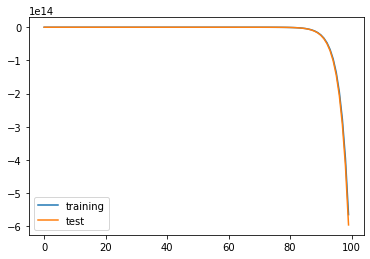

In [49]:
build_nn(train_bow_matrix, data_train['LabelNumber'], test_bow_matrix, data_test['LabelNumber'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 100)               449600    
                                                                 
 dense_15 (Dense)            (None, 1)                 101       
                                                                 
Total params: 449,701
Trainable params: 449,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
29/29 [==============================] - 1s 11ms/step - loss: 0.3468 - accuracy: 0.6627 - recall_7: 0.9629 - val_loss: 0.0629 - val_accuracy: 0.7328 - val_recall_7: 1.0000
Epoch 2/100
29/29 [==============================] - 0s 4ms/step - loss: -0.1955 - accuracy: 0.6889 - recall_7: 1.0000 - val_loss: -0.3304 - val_accuracy: 0.7328 - val_recall_7: 1.0000
Epoch 3/100
29/29 [==============================] - 0s 4ms/step - loss: -0

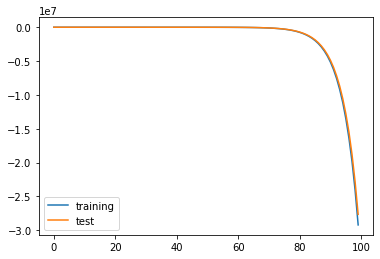

Correlation coefficient Traindata: nan
Correlation coefficient Testdata: nan


In [43]:
build_nn(train_tfidf_matrix, data_train['LabelNumber'], test_tfidf_matrix, data_test['LabelNumber'])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               1100      
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                                 
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
29/29 [==============================] - 1s 10ms/step - loss: 0.3825 - accuracy: 0.6659 - recall_8: 0.9651 - val_loss: 0.1151 - val_accuracy: 0.7328 - val_recall_8: 1.0000
Epoch 2/100
29/29 [==============================] - 0s 3ms/step - loss: -0.1231 - accuracy: 0.6889 - recall_8: 1.0000 - val_loss: -0.2635 - val_accuracy: 0.7328 - val_recall_8: 1.0000
Epoch 3/100
29/29 [==============================] - 0s 3ms/step - loss: -0.490

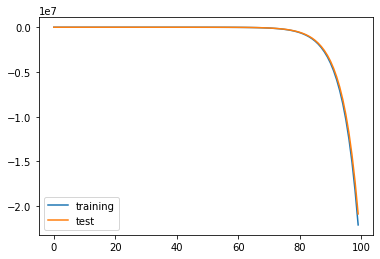

Correlation coefficient Traindata: nan
Correlation coefficient Testdata: nan


In [44]:
build_nn(train_lsa_matrix, data_train['LabelNumber'], test_lsa_matrix, data_test['LabelNumber'])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 100)               5100      
                                                                 
 dense_19 (Dense)            (None, 1)                 101       
                                                                 
Total params: 5,201
Trainable params: 5,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
29/29 [==============================] - 1s 10ms/step - loss: 0.1030 - accuracy: 0.6070 - recall_9: 0.8821 - val_loss: -0.3309 - val_accuracy: 0.7328 - val_recall_9: 1.0000
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: -0.7934 - accuracy: 0.6889 - recall_9: 1.0000 - val_loss: -0.8915 - val_accuracy: 0.7328 - val_recall_9: 1.0000
Epoch 3/100
29/29 [==============================] - 0s 3ms/step - loss: -1.38

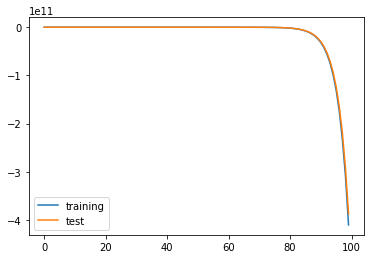

Correlation coefficient Traindata: nan
Correlation coefficient Testdata: nan


In [45]:
build_nn(train_doc2vec_matrix, data_train['LabelNumber'], test_doc2vec_matrix, data_test['LabelNumber'])